# OAS 2024-27-02 EDA 
## Data download

1. Filter research from oas website, having for each category a wget file sh. (i.e. healthy_unsorted_heavy_IGA.sh)

2. Run oas_download.sh for each wget sh file

From oas search:  
1. **Unsorted B Cells**  
Your search yielded 155,156 filtered sequences from 2 studies  
2. **Naive-B Cells:**  
Your search yielded 161,327 filtered sequences from 1 studies  
3. **Memory-B-Cells:**  
Your search yielded 207,539 filtered sequences from 2 studies.  
4. **Plasma-B-Cells:**  
Your search yielded 41,614 filtered sequences from 1 studies.  

## Adding of csv file to OAS_db database

In [1]:
'''
sqlite> .open /ibmm_data/oas_database/OAS.db
sqlite> .mode csv
sqlite> .import ./OAS_db_paired_healthy_2024-02-27.csv healthy_paired
sqlite> .tables
healthy_paired     heavy_healthy_iga  heavy_hiv_iga      heavy_hiv_igg    
sqlite> .table
healthy_paired     heavy_healthy_iga  heavy_hiv_iga      heavy_hiv_igg 
'''

'\nsqlite> .open /ibmm_data/oas_database/OAS.db\nsqlite> .mode csv\nsqlite> .import ./OAS_db_paired_healthy_2024-02-27.csv healthy_paired\nsqlite> .tables\nhealthy_paired     heavy_healthy_iga  heavy_hiv_iga      heavy_hiv_igg    \nsqlite> .table\nhealthy_paired     heavy_healthy_iga  heavy_hiv_iga      heavy_hiv_igg \n'

# SQLITE3 DB

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

In [3]:
# Connection to the db
import sqlite3
sqliteConnection = sqlite3.connect('/ibmm_data/oas_database/OAS.db')
cursor = sqliteConnection.cursor()

In [4]:
## SQL DB EXAMPLE
sql_command="SELECT sequence_heavy FROM healthy_paired"
cursor.execute(sql_command)
ans = cursor.fetchall()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f9d1258dd60>>
Traceback (most recent call last):
  File "/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


#  Check for Missing Values using sqlite3

In [9]:
# Step 1: Connect to the SQLite database
conn = sqlite3.connect('/ibmm_data/oas_database/OAS.db')

# Read data from SQLite database into a pandas DataFrame
query = "SELECT * FROM healthy_paired"
df_healthy_paired = pd.read_sql_query(query, conn)

# Don't forget to close the connection when you're done
conn.close()

# Step 2: Check for missing values
missing_values = df_healthy_paired.isnull().sum()

# Print columns with missing values
print('Missing values in each column:')
print(missing_values[missing_values > 0])

# Alternatively, to print a boolean indicating the presence of missing values in any column
print('Any missing values:', missing_values.any())


Missing values in each column:
Series([], dtype: int64)
Any missing values: False


### select sequences from healthy_paired

In [4]:
sql_command="SELECT sequence_heavy FROM healthy_paired"
cursor.execute(sql_command)
cdr3_aa = cursor.fetchall()

#### Pre clustering of whole healthy_paired table

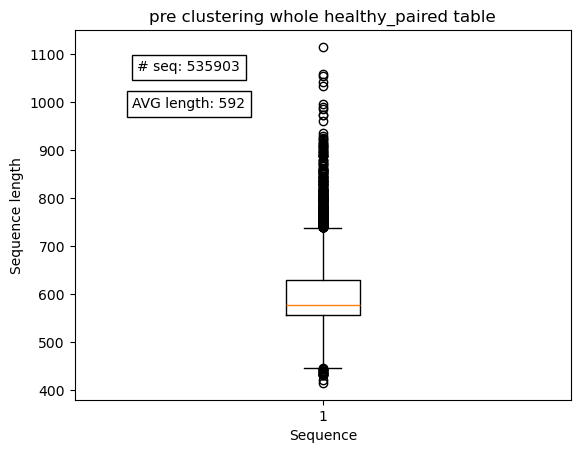

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'pre clustering whole healthy_paired table')

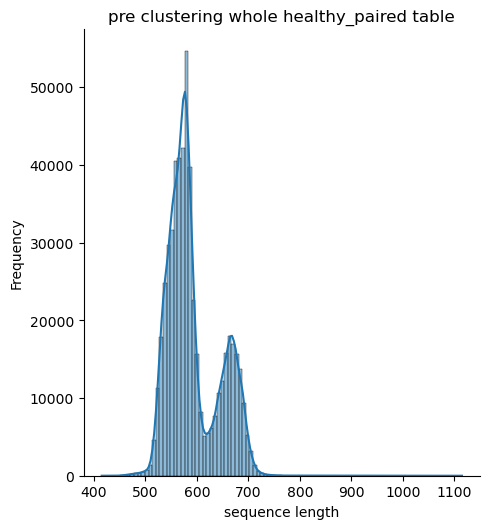

In [10]:
cdr3_aa_len = [len(str(x)) for x in cdr3_aa] #from sqlite3
plt.boxplot(cdr3_aa_len)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('pre clustering whole healthy_paired table')
text = f'# seq: {str(len(df_healthy_paired))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('sequence length')
plt.ylabel('Frequency')
plt.title('pre clustering whole healthy_paired table')

### Select all rows from healthy_paired table where the column "BType" has the value "Naive-B-Cells"

In [19]:
# Path to your SQLite database
db_path = '/ibmm_data/oas_database/OAS.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# SQL statement to select rows where BType is 'Naive-B-Cells'
select_query = "SELECT sequence_heavy FROM healthy_paired WHERE BType = 'Naive-B-Cells';"

# Execute the query
cursor.execute(select_query)

# Fetch all matching rows
rows_naive_b_cells = cursor.fetchall()
nbr_rows = len(rows_naive_b_cells)

# Check if any rows were found and print them
if rows_naive_b_cells:
    print(f"Found {nbr_rows} rows where BType is 'Naive-B-Cells':")
    # for row in rows:
    #     print(row)
else:
    print("No rows found where BType is 'Naive-B-Cells'.")

# Close the connection
conn.close()


Found 141488 rows where BType is 'Naive-B-Cells':


## Naive B-Cells Pre-Clustering

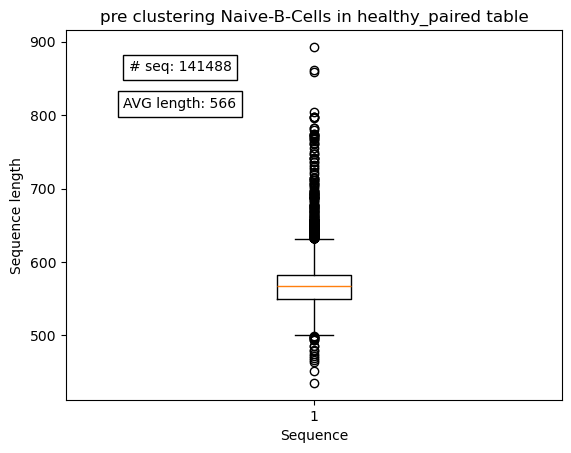

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'pre clustering Naive-B-Cells in healthy_paired table')

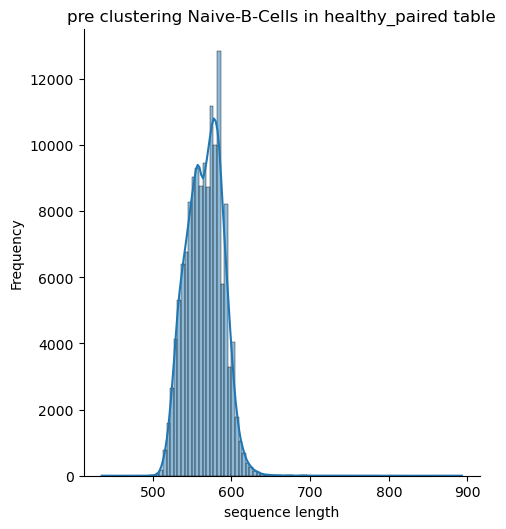

In [21]:
aa_len = [len(str(x)) for x in rows_naive_b_cells] #from sqlite3
plt.boxplot(aa_len)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('pre clustering Naive-B-Cells in healthy_paired table')
text = f'# seq: {str(len(rows_naive_b_cells))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(aa_len, kde=True, bins=100)
plt.xlabel('sequence length')
plt.ylabel('Frequency')
plt.title('pre clustering Naive-B-Cells in healthy_paired table')

### Memory B-Cells Pre-Clustering

In [23]:
# Path to your SQLite database
db_path = '/ibmm_data/oas_database/OAS.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# SQL statement to select rows where BType is 'Memory-B-Cells'
select_query = "SELECT sequence_heavy FROM healthy_paired WHERE BType = 'Memory-B-Cells';"

# Execute the query
cursor.execute(select_query)

# Fetch all matching rows
rows_memory_b_cells = cursor.fetchall()
nbr_rows_memory = len(rows_memory_b_cells)

# Check if any rows were found and print them
if rows_memory_b_cells:
    print(f"Found {nbr_rows_memory} rows where BType is 'Memory-B-Cells':")
    # for row in rows:
    #     print(row)
else:
    print("No rows found where BType is 'Memory-B-Cells'.")

# Close the connection
conn.close()

Found 201835 rows where BType is 'Memory-B-Cells':


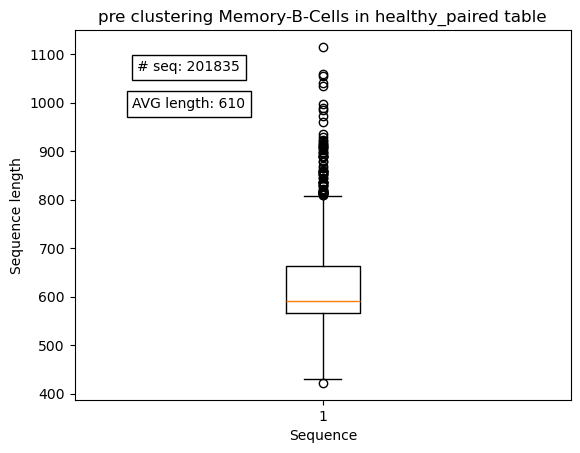

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'pre clustering Memory-B-Cells in healthy_paired table')

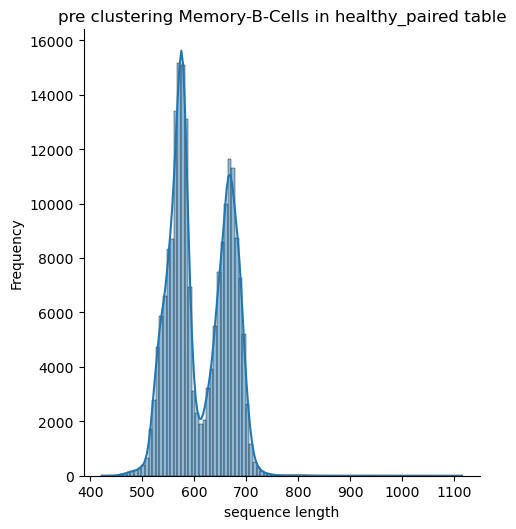

In [22]:
len_memory = [len(str(x)) for x in rows_memory_b_cells] #from sqlite3
plt.boxplot(len_memory)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('pre clustering Memory-B-Cells in healthy_paired table')
text = f'# seq: {str(len(rows_memory_b_cells))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(len_memory)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(len_memory, kde=True, bins=100)
plt.xlabel('sequence length')
plt.ylabel('Frequency')
plt.title('pre clustering Memory-B-Cells in healthy_paired table')

### Plasma B Cells Pre-Clustering

In [24]:
# Path to your SQLite database
db_path = '/ibmm_data/oas_database/OAS.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# SQL statement to select rows where BType is 'Plasma-B-Cells'
select_query = "SELECT sequence_heavy FROM healthy_paired WHERE BType = 'Plasma-B-Cells';"

# Execute the query
cursor.execute(select_query)

# Fetch all matching rows
rows_plasma_b_cells = cursor.fetchall()
nbr_rows_plasma = len(rows_plasma_b_cells)

# Check if any rows were found and print them
if rows_plasma_b_cells:
    print(f"Found {nbr_rows_plasma} rows where BType is 'Plasma-B-Cells':")
    # for row in rows:
    #     print(row)
else:
    print("No rows found where BType is 'Plasma-B-Cellss'.")

# Close the connection
conn.close()

Found 37736 rows where BType is 'Plasma-B-Cells':


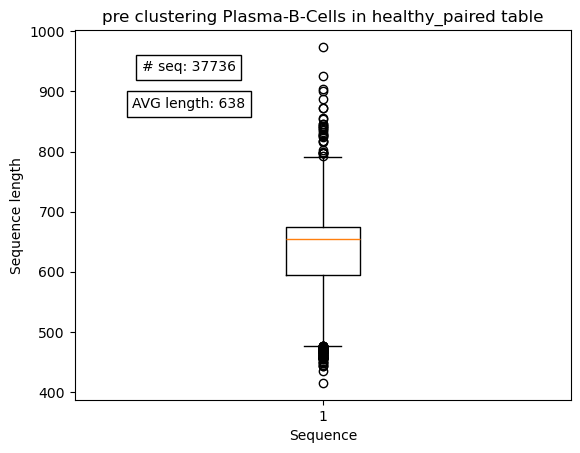

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'pre clustering Plasma-B-Cells in healthy_paired table')

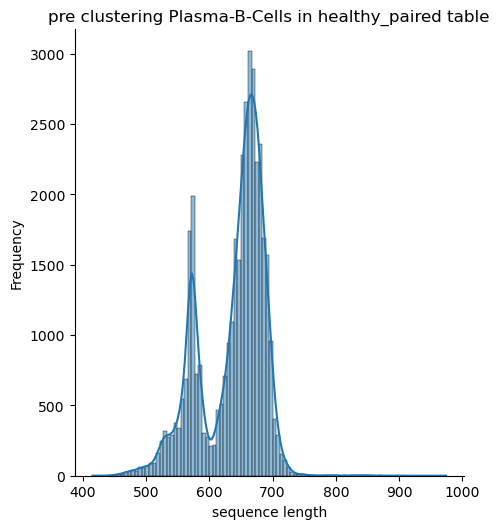

In [26]:
len_plasma = [len(str(x)) for x in rows_plasma_b_cells] #from sqlite3
plt.boxplot(len_plasma)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('pre clustering Plasma-B-Cells in healthy_paired table')
text = f'# seq: {str(len(rows_plasma_b_cells))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(len_plasma)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(len_plasma, kde=True, bins=100)
plt.xlabel('sequence length')
plt.ylabel('Frequency')
plt.title('pre clustering Plasma-B-Cells in healthy_paired table')

## Unsorted B Cells

In [27]:
# Path to your SQLite database
db_path = '/ibmm_data/oas_database/OAS.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# SQL statement to select rows where BType is 'Unsorted-B-Cells'
select_query = "SELECT sequence_heavy FROM healthy_paired WHERE BType = 'Unsorted-B-Cells';"

# Execute the query
cursor.execute(select_query)

# Fetch all matching rows
rows_unsorted_b_cells = cursor.fetchall()
nbr_rows_unsorted = len(rows_unsorted_b_cells)

# Check if any rows were found and print them
if rows_unsorted_b_cells:
    print(f"Found {nbr_rows_unsorted} rows where BType is 'Unsorted-B-Cells':")
    # for row in rows:
    #     print(row)
else:
    print("No rows found where BType is 'Unsorted-B-Cells'.")

# Close the connection
conn.close()

Found 154844 rows where BType is 'Unsorted-B-Cells':


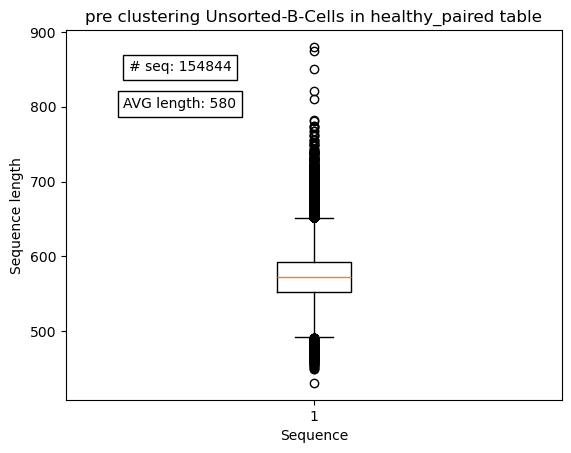

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'pre clustering Unsorted-B-Cells in healthy_paired table')

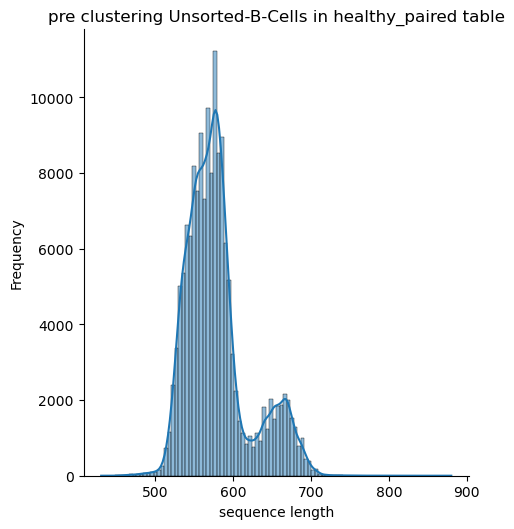

In [28]:
len_unsorted = [len(str(x)) for x in rows_unsorted_b_cells] #from sqlite3
plt.boxplot(len_unsorted)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('pre clustering Unsorted-B-Cells in healthy_paired table')
text = f'# seq: {str(len(rows_unsorted_b_cells))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(len_unsorted)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(len_unsorted, kde=True, bins=100)
plt.xlabel('sequence length')
plt.ylabel('Frequency')
plt.title('pre clustering Unsorted-B-Cells in healthy_paired table')

### Filter out duplicates

#### CLUSTERING

##### Pident 70

            0               1
0   HIV_IGA_1  ARGWGSYRKYFFES
1  HIV_IGA_33       GRDTGYVDY


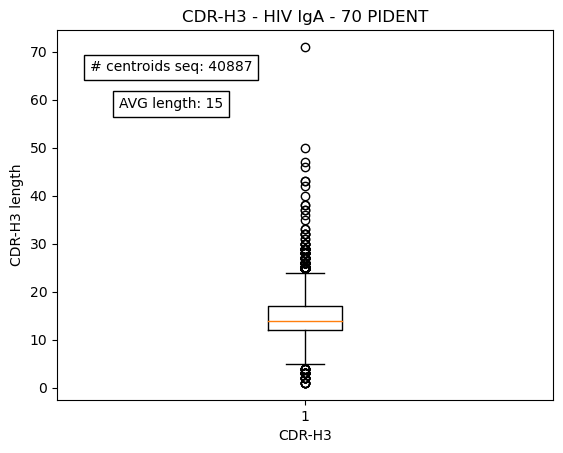

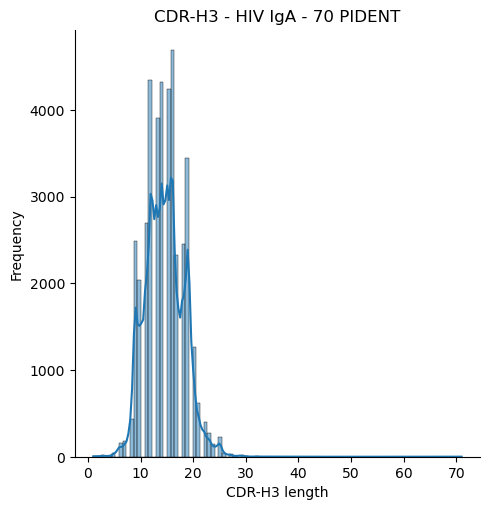

In [9]:
# DATA
hiv_iga=pd.read_csv('HIV_IGA/CLUSTERING/hiv_iga_cdrh3_raw_70_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgA - 70 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgA - 70 PIDENT')
plt.show()

##### Pident 80

            0               1
0   HIV_IGA_1  ARGWGSYRKYFFES
1  HIV_IGA_33       GRDTGYVDY


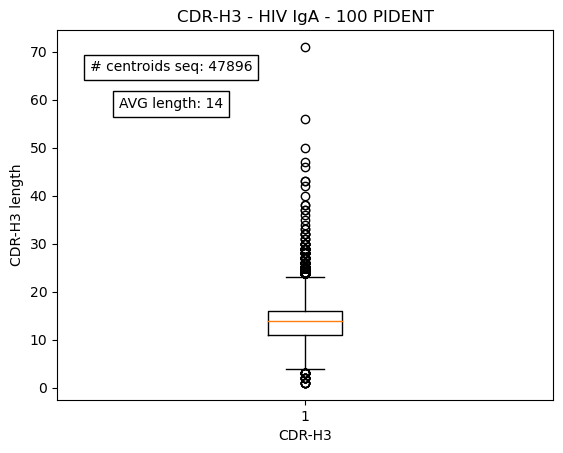

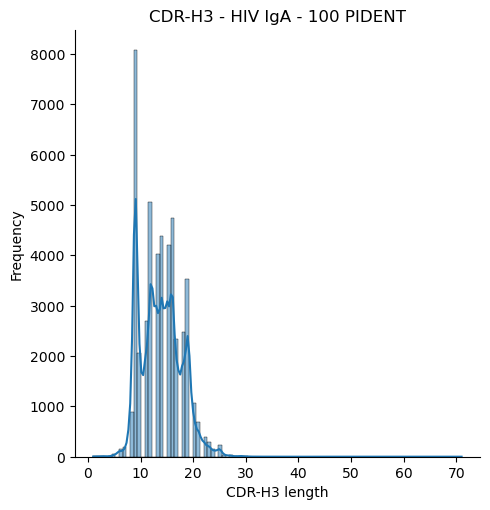

In [ ]:
# DATA
hiv_iga=pd.read_csv('HIV_IGA/CLUSTERING/hiv_iga_cdrh3_raw_80_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgA - 80 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgA - 100 PIDENT')
plt.show()

##### Pident 90

            0               1
0   HIV_IGA_1  ARGWGSYRKYFFES
1  HIV_IGA_33       GRDTGYVDY


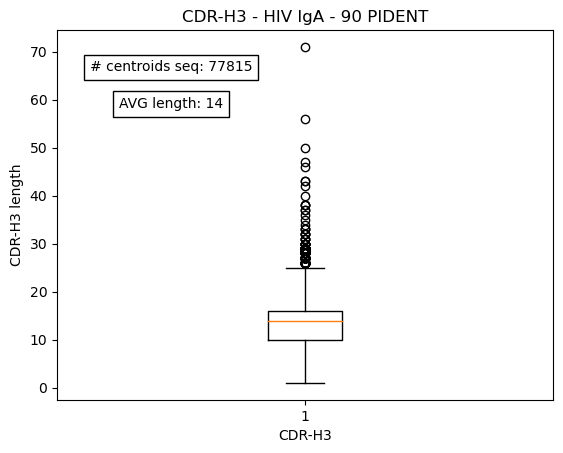

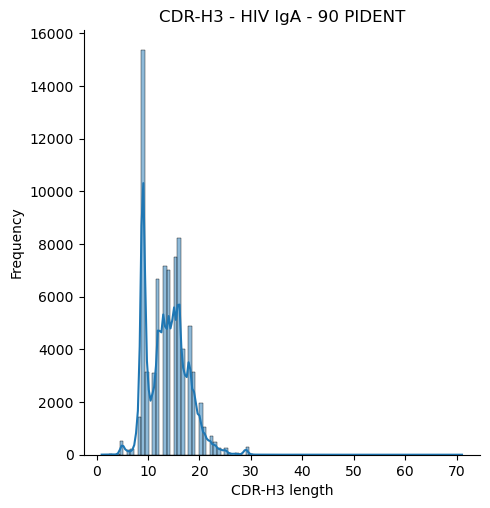

In [11]:
# DATA
hiv_iga=pd.read_csv('HIV_IGA/CLUSTERING/hiv_iga_cdrh3_raw_90_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgA - 90 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgA - 90 PIDENT')
plt.show()

##### Pident 100

            0               1
0   HIV_IGA_1  ARGWGSYRKYFFES
1  HIV_IGA_33       GRDTGYVDY


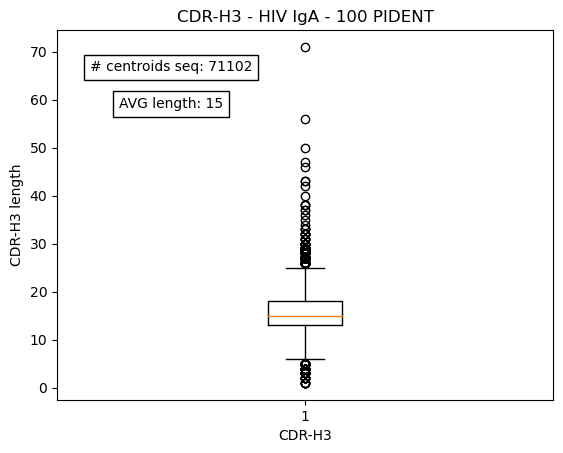

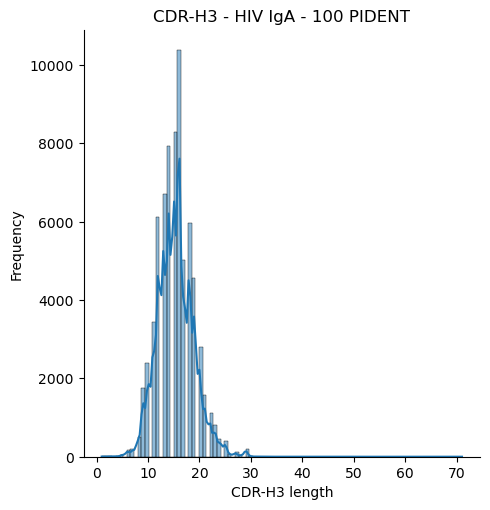

In [12]:
# DATA
hiv_iga=pd.read_csv('HIV_IGA/CLUSTERING/hiv_iga_cdrh3_raw_100_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgA - 100 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgA - 100 PIDENT')
plt.show()

In [13]:
# example of reading data with dask (not reccomand it, better use sqlite3)
import dask.dataframe as dd

# Read the CSV file using Dask
#dtype={'Total sequences': 'object'}
hiv_iga = dd.read_csv('HIV_IGA/OAS_db_HIV_IGA_2023-07-06.csv') # 48 sec almost 8G

# Compute the result
hiv_iga = hiv_iga.compute()

# Print the extracted values
#print(hiv_iga.head(15))

# Check for missing values
print('Missing values:',[hiv_iga.isnull().sum() != 0] == True)

Missing values: False


## IgG

### CDR-H3

In [14]:
sql_command="SELECT cdr3_aa FROM hiv_igg"
cursor.execute(sql_command)
cdr3_aa = cursor.fetchall()

In [15]:
# example of reading data with dask (not reccomand it, better use sqlite3)
import dask.dataframe as dd

# Read the CSV file using Dask
#dtype={'Total sequences': 'object'}
hiv_igg = dd.read_csv('HIV_IGG/OAS_db_HIV_IGG_2023-07-06.csv') # 48 sec almost 8G

# Compute the result
hiv_igg = hiv_igg.compute()

# Print the extracted values
#print(hiv_iga.head(15))

# Check for missing values
print('Missing values:',[hiv_igg.isnull().sum() != 0] == True)

/home/rodelc/anaconda3/envs/DALM/lib/python3.8/site-packages/dask/dataframe/io/csv.py:193: DtypeWarning: Columns (97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/home/rodelc/anaconda3/envs/DALM/lib/python3.8/site-packages/dask/dataframe/io/csv.py:193: DtypeWarning: Columns (97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Missing values: False


#### Pre clustering

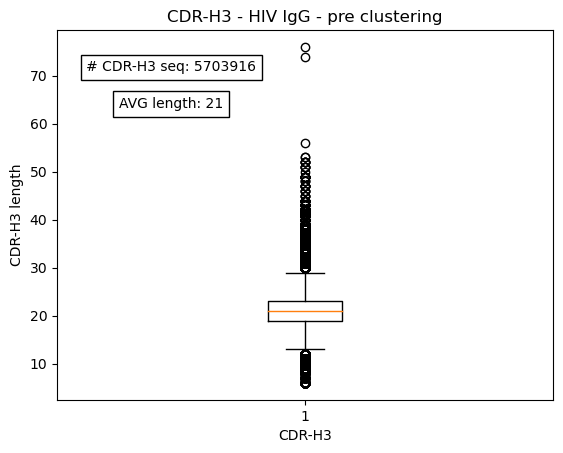

Text(0.5, 1.0, 'CDR-H3 - HIV IgG - pre clustering')

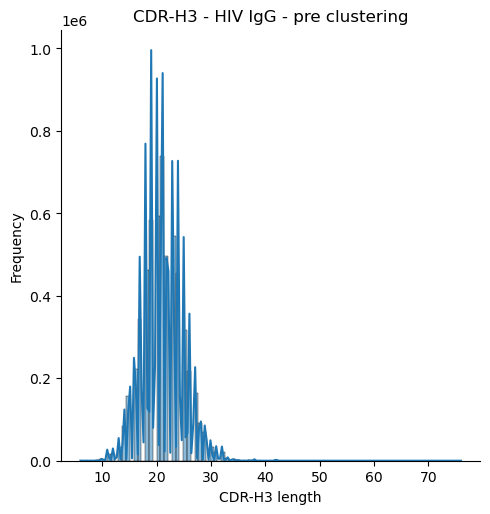

In [16]:
cdr3_aa_len = [len(str(x)) for x in cdr3_aa] #from sqlite3
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgG - pre clustering')
text = f'# CDR-H3 seq: {str(len(cdr3_aa))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgG - pre clustering')

#### CLUSTERING

##### Pident 70

            0                  1
0   HIV_IGG_1  AKDVISAPKPPYYGMDV
1  HIV_IGG_33  ARDPITRFSYTSYAFDV


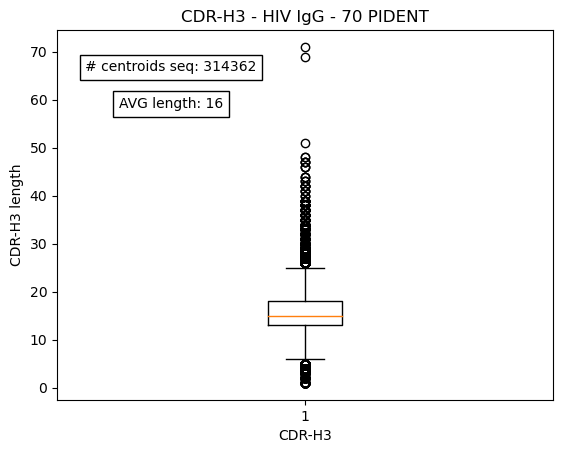

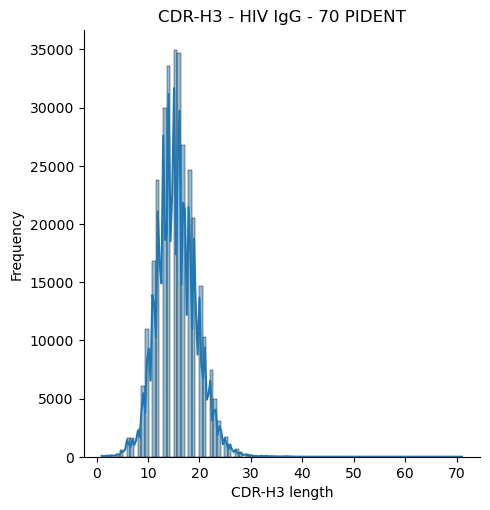

In [17]:
# DATA
hiv_iga=pd.read_csv('HIV_IGG/CLUSTERING/hiv_igg_cdrh3_raw_70_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgG - 70 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgG - 70 PIDENT')
plt.show()

##### Pident 80

            0                  1
0   HIV_IGG_1  AKDVISAPKPPYYGMDV
1  HIV_IGG_33  ARDPITRFSYTSYAFDV


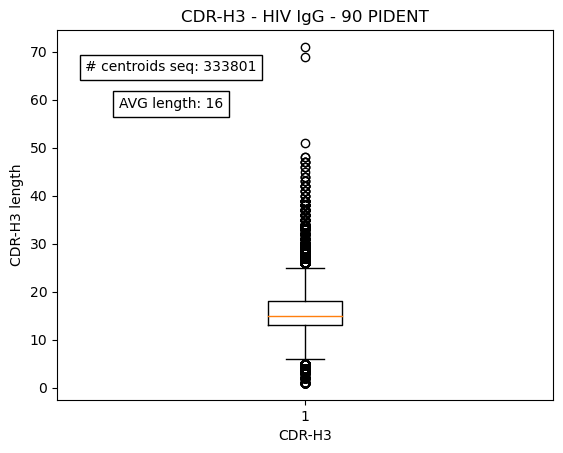

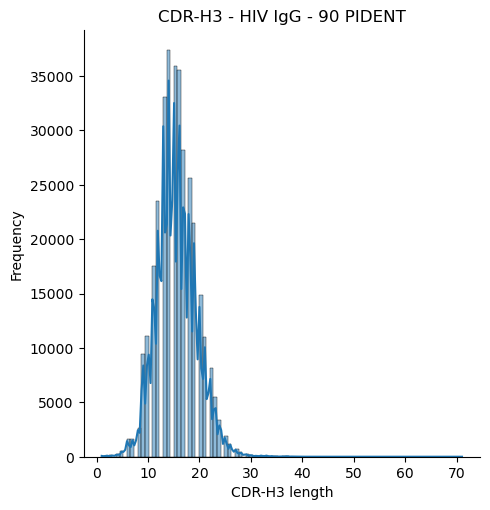

In [18]:
# DATA
hiv_iga=pd.read_csv('HIV_IGG/CLUSTERING/hiv_igg_cdrh3_raw_80_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgG - 80 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgG - 90 PIDENT')
plt.show()

##### Pident 90

            0                  1
0   HIV_IGG_1  AKDVISAPKPPYYGMDV
1  HIV_IGG_33  ARDPITRFSYTSYAFDV


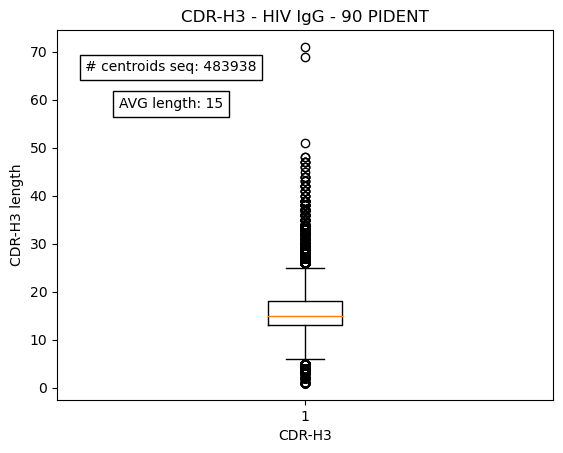

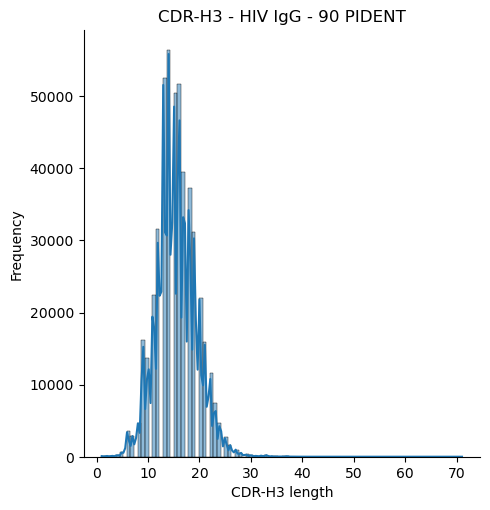

In [19]:
# DATA
hiv_iga=pd.read_csv('HIV_IGG/CLUSTERING/hiv_igg_cdrh3_raw_90_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgG - 90 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgG - 90 PIDENT')
plt.show()

##### Pident 100

            0                  1
0   HIV_IGG_1  AKDVISAPKPPYYGMDV
1  HIV_IGG_33  ARDPITRFSYTSYAFDV


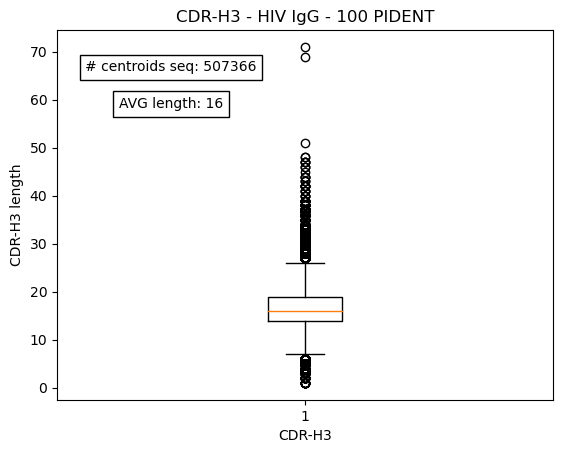

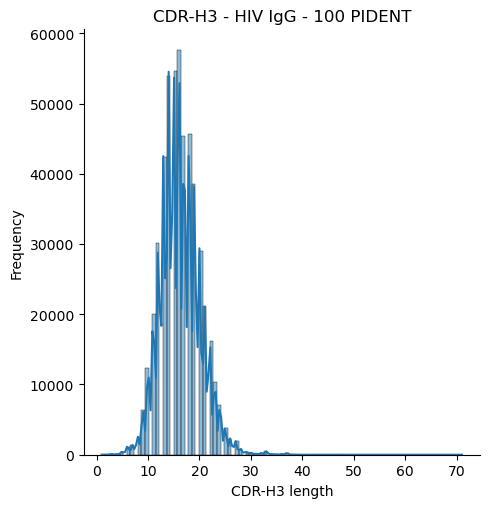

In [20]:
# DATA
hiv_iga=pd.read_csv('HIV_IGG/CLUSTERING/hiv_igg_cdrh3_raw_100_clu_rep_idseq',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HIV IgG - 100 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgG - 100 PIDENT')
plt.show()

# HEALTHY IgA

### CDR-H3

In [2]:
cdr3_aa = pd.read_csv('HEALTHY_IGA/CLUSTERING/healthy_iga_cdrh3_raw_idseq',header=None)
cdr3_aa.head(2)

,0,1
0,HEALTHY_IGA_1,ARQPAATGEWYFRD
1,HEALTHY_IGA_2,ARGGSPAAATRPFDS


#### Pre clustering

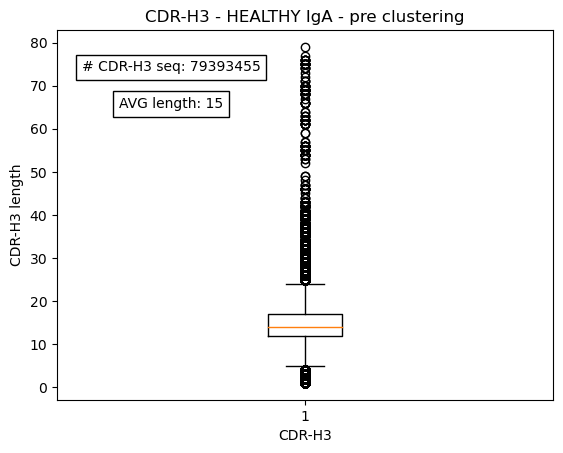

Text(0.5, 1.0, 'CDR-H3 - HEALTHY IgA - pre clustering')

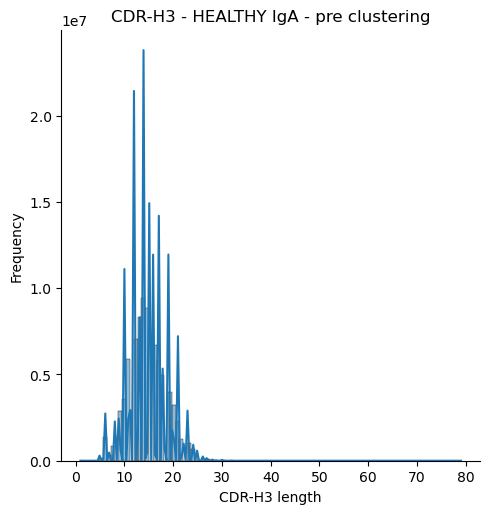

In [3]:
cdr3_aa_len = [len(str(x)) for x in cdr3_aa[1]] #from sqlite3 ### COLUMN 1, DIFFERENT FROM HIV
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgA - pre clustering')
text = f'# CDR-H3 seq: {str(len(cdr3_aa))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgA - pre clustering')

#### CLUSTERING

##### Pident 70

                0               1
0   HEALTHY_IGA_1  ARQPAATGEWYFRD
1  HEALTHY_IGA_33        ARGGALDY


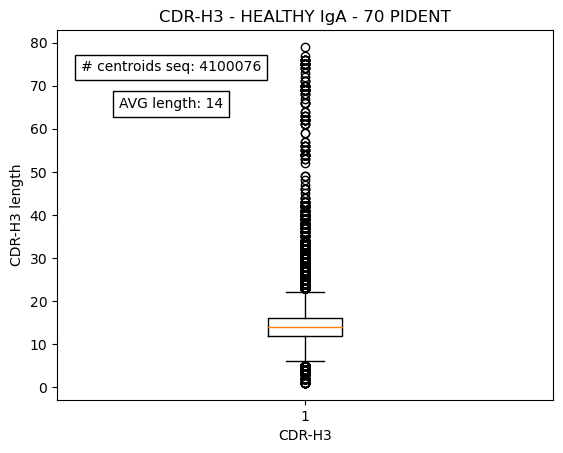

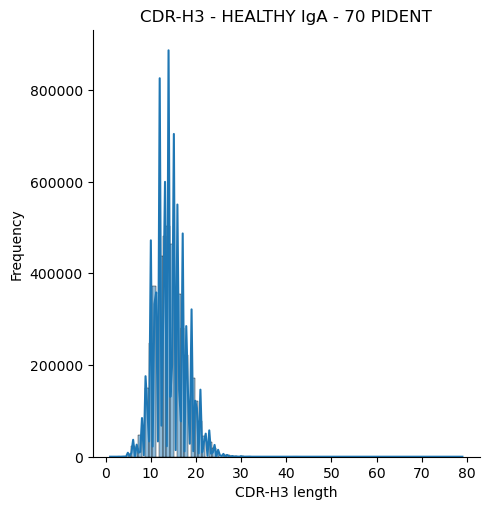

In [4]:
# DATA
hiv_iga=pd.read_csv('HEALTHY_IGA/CLUSTERING/healthy_iga_cdrh3_raw_70_clu_rep_idseq_noduplicates',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgA - 70 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgA - 70 PIDENT')
plt.show()

##### Pident 80

                0               1
0   HEALTHY_IGA_1  ARQPAATGEWYFRD
1  HEALTHY_IGA_33        ARGGALDY


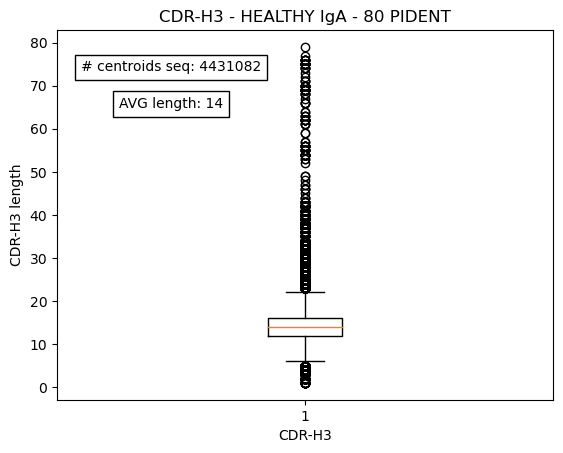

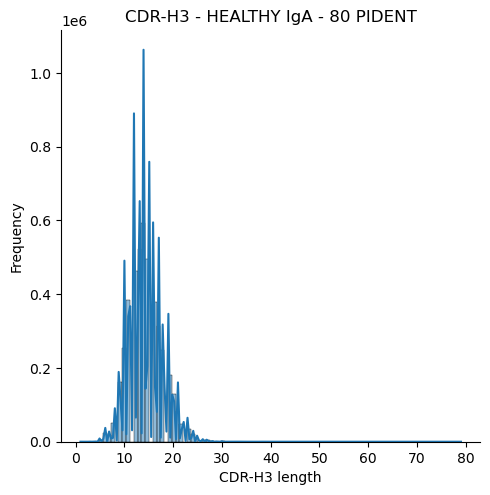

In [5]:
# DATA
hiv_iga=pd.read_csv('HEALTHY_IGA/CLUSTERING/healthy_iga_cdrh3_raw_80_clu_rep_idseq_noduplicates',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgA - 80 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgA - 80 PIDENT')
plt.show()

##### Pident 90

                0               1
0   HEALTHY_IGA_1  ARQPAATGEWYFRD
1  HEALTHY_IGA_33        ARGGALDY


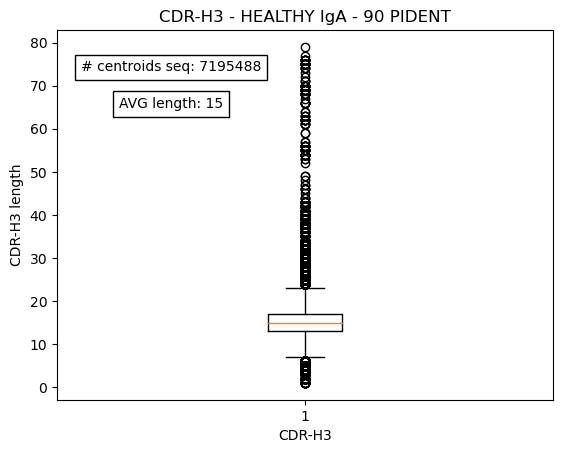

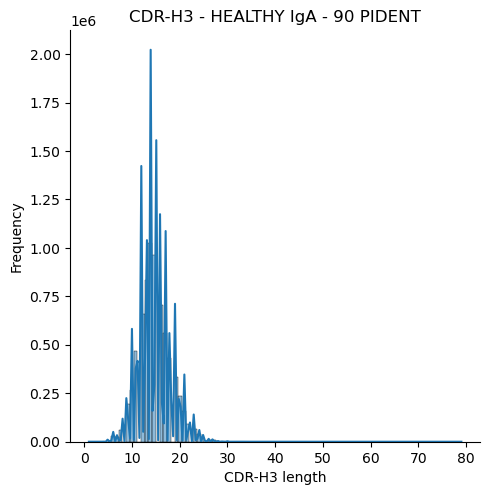

In [6]:
# DATA
hiv_iga=pd.read_csv('HEALTHY_IGA/CLUSTERING/healthy_iga_cdrh3_raw_90_clu_rep_idseq_noduplicates',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgA - 90 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgA - 90 PIDENT')
plt.show()

##### Pident 100

                0               1
0   HEALTHY_IGA_1  ARQPAATGEWYFRD
1  HEALTHY_IGA_33        ARGGALDY


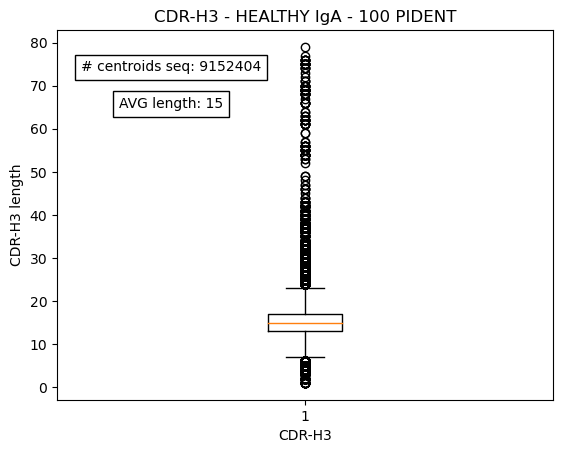

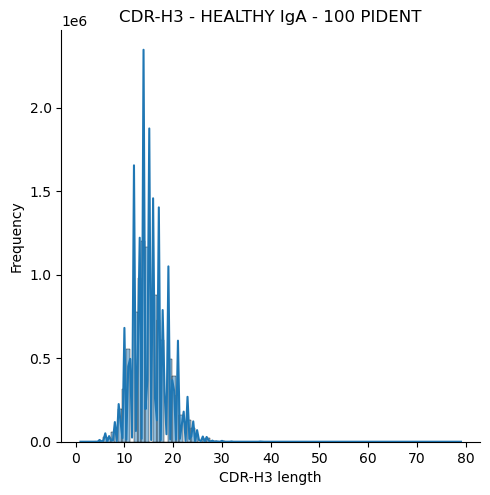

In [7]:
# DATA
hiv_iga=pd.read_csv('HEALTHY_IGA/CLUSTERING/healthy_iga_cdrh3_raw_100_clu_rep_idseq_noduplicates',header=None)
print(hiv_iga.head(2))
# BOXPLOT
cdr3_aa_len = hiv_iga[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgA - 100 PIDENT')
text = f'# centroids seq: {str(len(hiv_iga))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgA - 100 PIDENT')
plt.show()

# HEALTHY IgG

### CDR-H3

In [8]:
cdr3_aa = pd.read_csv('HEALTHY_IGG/CLUSTERING/healthy_igg_cdrh3_raw_idseq',header=None)
cdr3_aa.head(2)

,0,1
0,HEALTHY_IGG_1,ARGLYEDYGYFDF
1,HEALTHY_IGG_2,LSQLSRSSHY


#### Pre clustering

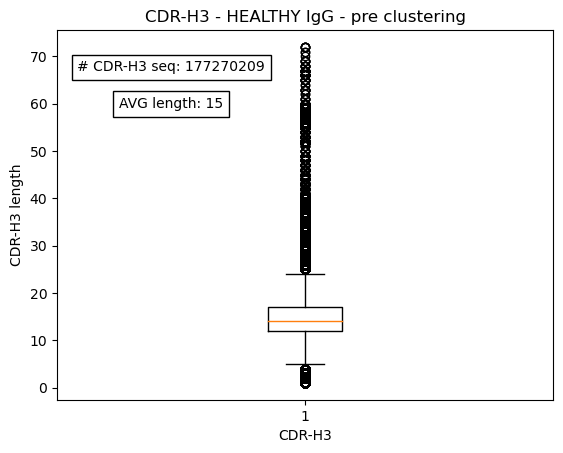

Text(0.5, 1.0, 'CDR-H3 - HEALTHY IgG - pre clustering')

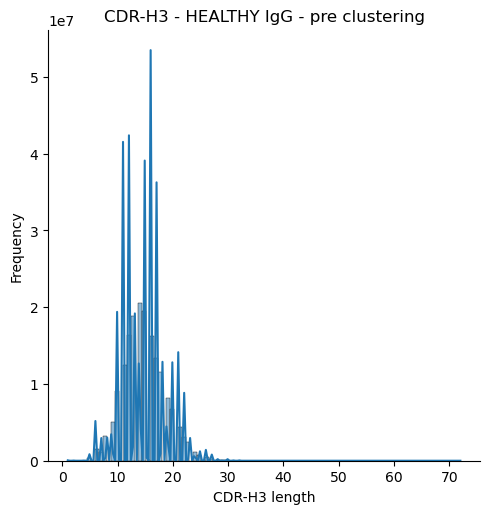

In [9]:
cdr3_aa_len = [len(str(x)) for x in cdr3_aa[1]] #from sqlite3 ### COLUMN 1, DIFFERENT FROM HIV
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgG - pre clustering')
text = f'# CDR-H3 seq: {str(len(cdr3_aa))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgG - pre clustering')

#### CLUSTERING

##### Pident 70

                0                     1
0  HEALTHY_IGG_33  ARLPSPGCSGGNCFCNAYDI
1  HEALTHY_IGG_65       ARGGRTGRYWGYEDD


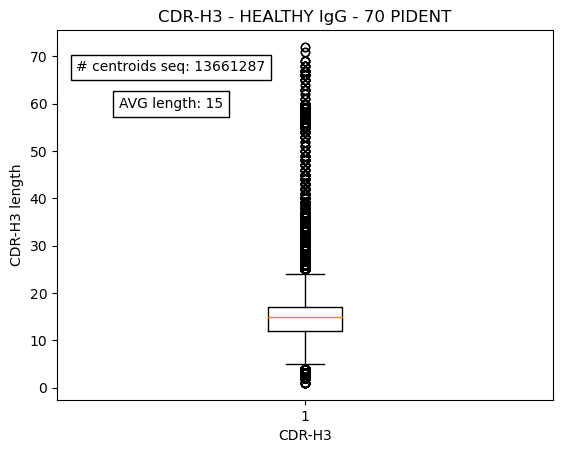

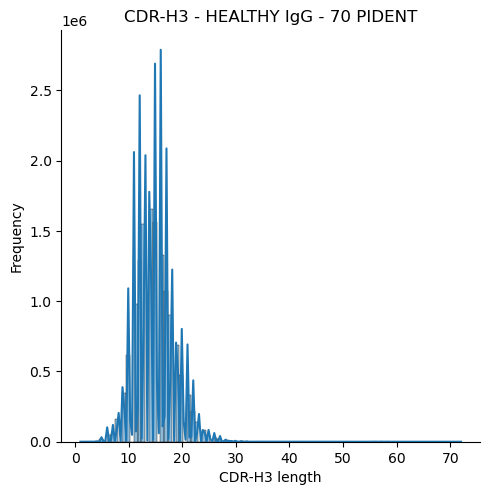

In [10]:
# DATA
healthy_igg=pd.read_csv('HEALTHY_IGG/CLUSTERING/healthy_igg_cdrh3_raw_70_clu_rep_idseq_noduplicates',header=None)
print(healthy_igg.head(2))
# BOXPLOT
cdr3_aa_len = healthy_igg[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgG - 70 PIDENT')
text = f'# centroids seq: {str(len(healthy_igg))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgG - 70 PIDENT')
plt.show()

##### Pident 80

                0                     1
0  HEALTHY_IGG_33  ARLPSPGCSGGNCFCNAYDI
1  HEALTHY_IGG_65       ARGGRTGRYWGYEDD


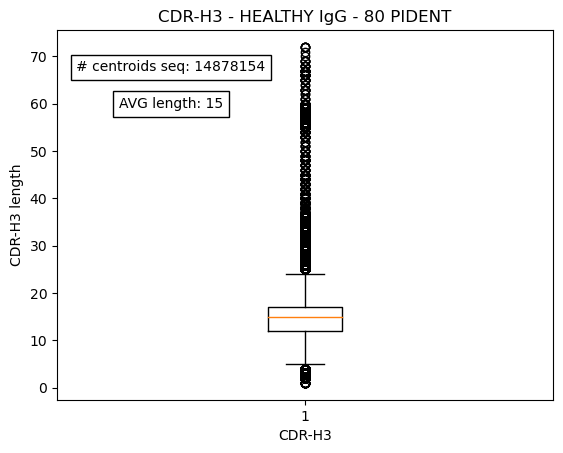

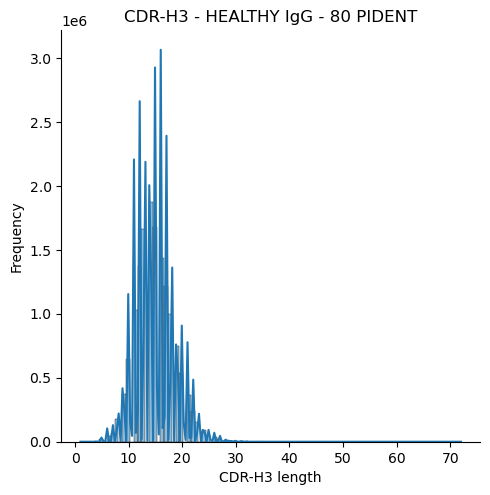

In [11]:
# DATA
healthy_igg=pd.read_csv('HEALTHY_IGG/CLUSTERING/healthy_igg_cdrh3_raw_80_clu_rep_idseq_noduplicates',header=None)
print(healthy_igg.head(2))
# BOXPLOT
cdr3_aa_len = healthy_igg[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgG - 80 PIDENT')
text = f'# centroids seq: {str(len(healthy_igg))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgG - 80 PIDENT')
plt.show()

##### Pident 90

                0                     1
0  HEALTHY_IGG_33  ARLPSPGCSGGNCFCNAYDI
1  HEALTHY_IGG_65       ARGGRTGRYWGYEDD


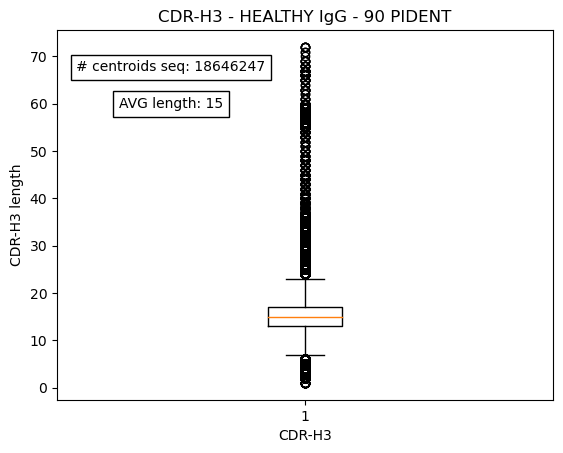

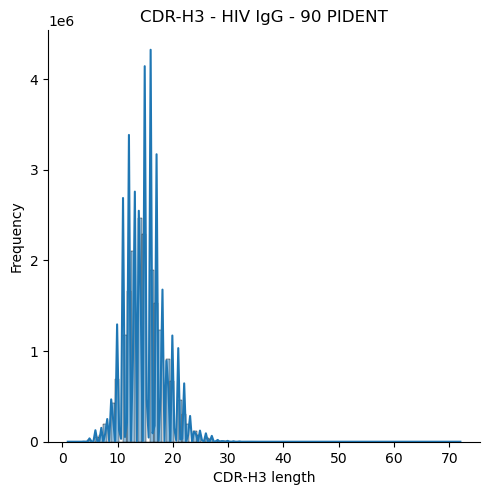

In [12]:
# DATA
healthy_igg=pd.read_csv('HEALTHY_IGG/CLUSTERING/healthy_igg_cdrh3_raw_90_clu_rep_idseq_noduplicates',header=None)
print(healthy_igg.head(2))
# BOXPLOT
cdr3_aa_len = healthy_igg[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgG - 90 PIDENT')
text = f'# centroids seq: {str(len(healthy_igg))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HIV IgG - 90 PIDENT')
plt.show()

##### Pident 100

                0                     1
0  HEALTHY_IGG_33  ARLPSPGCSGGNCFCNAYDI
1  HEALTHY_IGG_65       ARGGRTGRYWGYEDD


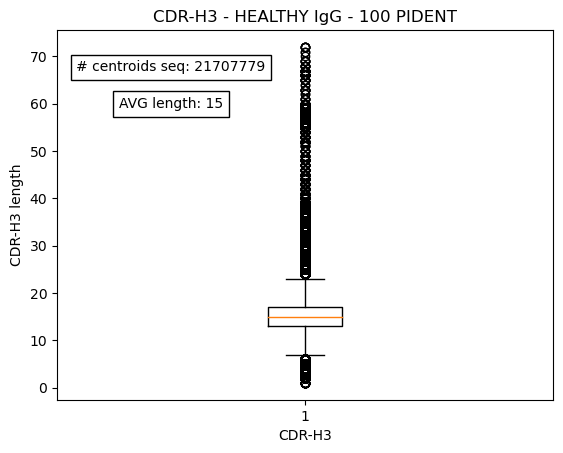

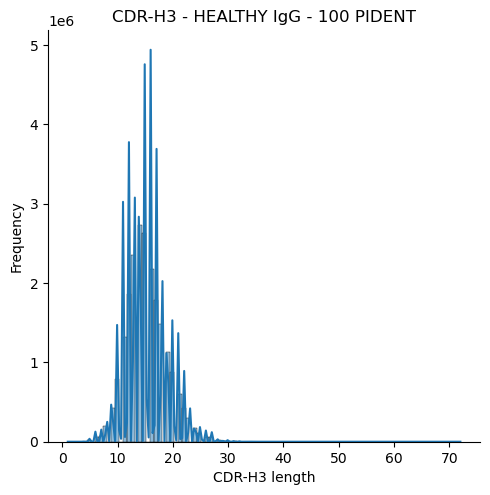

In [13]:
# DATA
healthy_igg=pd.read_csv('HEALTHY_IGG/CLUSTERING/healthy_igg_cdrh3_raw_100_clu_rep_idseq_noduplicates',header=None)
print(healthy_igg.head(2))
# BOXPLOT
cdr3_aa_len = healthy_igg[1].apply(lambda x: len(str(x)))
plt.boxplot(cdr3_aa_len)
plt.ylabel('CDR-H3 length')
plt.xlabel('CDR-H3')
plt.title('CDR-H3 - HEALTHY IgG - 100 PIDENT')
text = f'# centroids seq: {str(len(healthy_igg))}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {str(round(statistics.mean(cdr3_aa_len)))}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()
# KDE
sns.displot(cdr3_aa_len, kde=True, bins=100)
plt.xlabel('CDR-H3 length')
plt.ylabel('Frequency')
plt.title('CDR-H3 - HEALTHY IgG - 100 PIDENT')
plt.show()